In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, roc_curve, auc, recall_score, make_scorer, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("data.csv", header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.143865,0.411273,0.140056,0.139913,0.099814,0.631469,0.061907,0.093719,0.368737,0.631263,8.370397,15.929606,no
1,0.110212,0.449927,0.035153,0.126571,0.049433,0.659101,0.080718,0.022636,0.340924,0.659076,8.156873,13.065718,no
2,0.121081,0.439112,0.015049,0.201141,0.042917,0.710698,0.060297,0.000955,0.348001,0.651999,6.120026,10.166900,no
3,0.132230,0.419115,0.019463,0.220118,0.046813,0.685828,0.057426,0.049046,0.328534,0.671466,6.930611,11.473400,no
4,0.095986,0.461210,0.008385,0.130301,0.057517,0.665811,0.041245,0.021782,0.316851,0.683149,8.487839,13.651040,no


In [4]:
data[12].value_counts()

no         200
yes        200
up/down    200
Name: 12, dtype: int64

<AxesSubplot:xlabel='0', ylabel='1'>

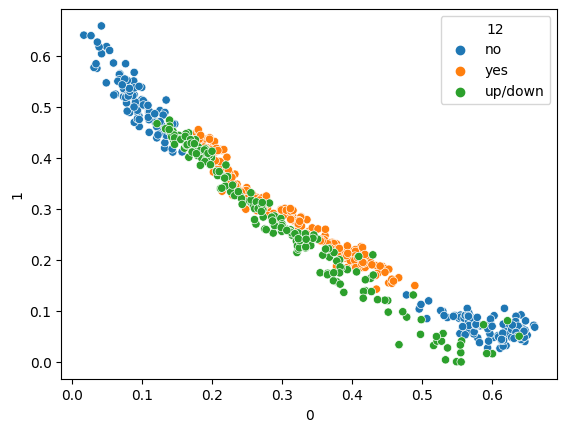

In [5]:
sns.scatterplot(x=0, y=1, data=data, hue=12)

<AxesSubplot:xlabel='2', ylabel='3'>

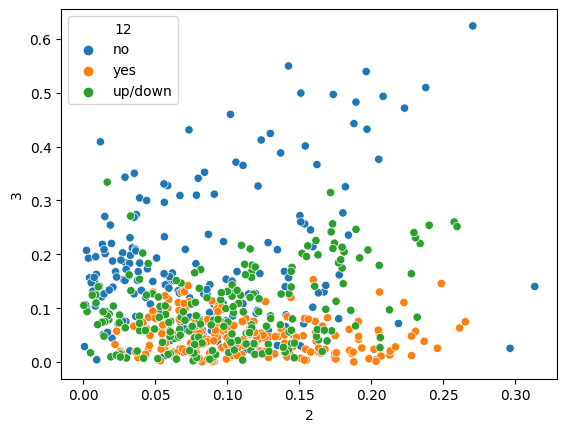

In [6]:
sns.scatterplot(x=2, y=3, data=data, hue=12)

<AxesSubplot:xlabel='4', ylabel='5'>

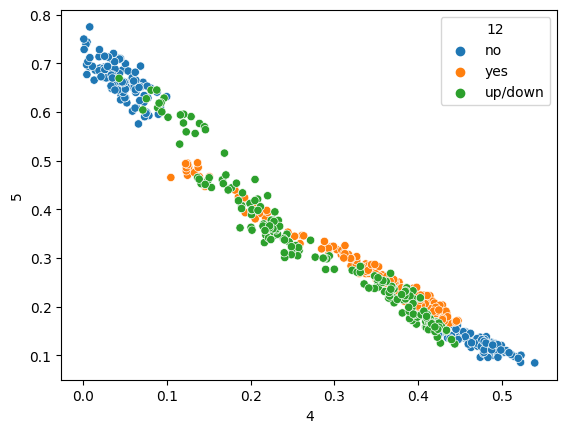

In [7]:
sns.scatterplot(x=4, y=5, data=data, hue=12)

In [10]:
X = data[[0,1,4,5]][data[12].isin(['yes', 'no'])].to_numpy()
y = np.array([1 if i == 'yes' else 0 for i in data[12][data[12].isin(['yes', 'no'])]])

In [11]:
X.shape

(400, 4)

In [12]:
y.shape

(400,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [16]:
param_grid_rf = {
    "max_depth": [2,3,5,7],
    "max_features": ['sqrt', 10, 50, 100, 150, 200, None],
    "n_estimators": [50, 100, 150]
}

optimal_params_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    verbose=2,
    n_jobs=1,
    cv=5
)

In [17]:
optimal_params_rf.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=150; total time=   0.2s
[CV] END ...max_depth=2, max_features=sqrt, n_e

/home/mohotta/anaconda3/envs/gaze-tracker-python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mohotta/anaconda3/envs/gaze-tracker-python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mohotta/anaconda3/envs/gaze-tracker-python/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/home/mohotta/anaconda3/envs/gaze-tracker-python/lib/python3.7/sit

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [2, 3, 5, 7],
                         'max_features': ['sqrt', 10, 50, 100, 150, 200, None],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=2)

In [18]:
y_pred = optimal_params_rf.predict(X_train)
f1_sc = f1_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
acc_score = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print(f"train -> f1-score: {f1_sc} | recall: {recall} | accuracy: {acc_score} | precision: {precision}")

train -> f1-score: 1.0 | recall: 1.0 | accuracy: 1.0 | precision: 1.0


In [19]:
y_pred = optimal_params_rf.predict(X_test)
f1_sc = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"test -> f1-score: {f1_sc} | recall: {recall} | accuracy: {acc_score} | precision: {precision}")

test -> f1-score: 1.0 | recall: 1.0 | accuracy: 1.0 | precision: 1.0


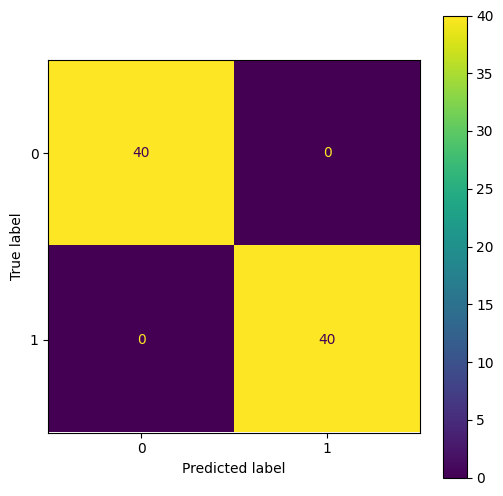

In [20]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(ax=ax)
plt.show()

In [21]:
import pickle

pickle.dump(optimal_params_rf.best_estimator_, open('model.pkl', 'wb'))